# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("training.csv", delimiter=";")
df.shape

(3700, 19)

In [3]:
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


## Checking NA Values

1. number of NA values in columns shows there might be a significant correlation between some columns
2. 58% of var18 values are NA, var18 to be dropped

In [4]:
na_columns = df.columns[df.isna().any()].tolist()
df[na_columns].isna().sum()

variable1       39
variable2       39
variable4       64
variable5       64
variable6       66
variable7       66
variable14     100
variable17     100
variable18    2145
dtype: int64

None of the rows that have var1 as NA have var2 as NA, relationship to be reviewed

In [5]:
variable1_na_indices = df['variable1'][df['variable1'].isna()].index.tolist()
variable2_na_indices = df['variable2'][df['variable2'].isna()].index.tolist()
variable1_na_indices == variable2_na_indices

False

In [6]:
variable1_na_indices = set(variable1_na_indices)
variable2_na_indices = set(variable2_na_indices)
intersection = variable1_na_indices.intersection(variable2_na_indices)
len(intersection)

0

All rows that have var4 as NA have var5 as NA

In [7]:
variable4_na_indices = df['variable4'][df['variable4'].isna()].index.tolist()
variable5_na_indices = df['variable5'][df['variable5'].isna()].index.tolist()
variable4_na_indices == variable5_na_indices

True

All rows that have var6 as NA have var7 as NA

In [8]:
variable6_na_indices = df['variable6'][df['variable6'].isna()].index.tolist()
variable7_na_indices = df['variable7'][df['variable7'].isna()].index.tolist()
variable6_na_indices == variable7_na_indices

True

All rows that have var14 as NA have var17 as NA

In [9]:
variable14_na_indices = df['variable14'][df['variable14'].isna()].index.tolist()
variable17_na_indices = df['variable17'][df['variable17'].isna()].index.tolist()
variable14_na_indices == variable17_na_indices

True

## Looking for Relationships

no apparent relationship between var1 and var2

In [10]:
df[['variable1', 'variable2']].head()

,variable1,variable2
0,a,"17,92"
1,b,"16,92"
2,b,"31,25"
3,a,"48,17"
4,b,"32,33"


100% correlation between var4 and var5, var5 to be dropped

In [11]:
df[['variable4', 'variable5']].head()

,variable4,variable5
0,u,g
1,y,p
2,u,g
3,u,g
4,u,g


In [12]:
print(df['variable4'].unique())
print(df['variable5'].unique())

['u' 'y' nan 'l']
['g' 'p' nan 'gg']


In [13]:
print(df['variable4'][df['variable4']=='u'].index.tolist() == df['variable5'][df['variable5']=='g'].index.tolist())
print(df['variable4'][df['variable4']=='y'].index.tolist() == df['variable5'][df['variable5']=='p'].index.tolist())
print(df['variable4'][df['variable4']=='l'].index.tolist() == df['variable5'][df['variable5']=='gg'].index.tolist())

True
True
True


no apparent relationship between var6 and var7

In [14]:
df[['variable6', 'variable7']].head()

,variable6,variable7
0,c,v
1,k,v
2,ff,ff
3,i,o
4,k,v


100% correlation between var14 and var17, var17 to be dropped

In [15]:
df[['variable14', 'variable17']].head()

,variable14,variable17
0,80.0,800000.0
1,200.0,2000000.0
2,96.0,960000.0
3,0.0,0.0
4,232.0,2320000.0


In [16]:
sum(df['variable17'] == df['variable14'] * 10000.0)

3600

In [17]:
df[['variable14','variable17']][df['variable17'] != df['variable14'] * 10000.0].isna().all()

variable14    True
variable17    True
dtype: bool

### Insights so far
> 1. 58% of var18 values are *NA*, var18 to be dropped
> 2. 100% correlation between var4 and var5, var5 to be dropped
> 3. 100% correlation between var14 and var17, var17 to be dropped

## Looking for More Relationships

In [18]:
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


All rows that have var10 as "f" have var11 as 0, when var10 is "t", var11 is a positive integer, var10 to be dropped

In [19]:
df[['variable10', 'variable11']].head()

,variable10,variable11
0,t,1
1,f,0
2,t,1
3,f,0
4,f,0


In [20]:
variable10_f_indices = df['variable10'][df['variable10']=='f'].index.tolist()
variable11_0_indices = df['variable11'][df['variable11']==0].index.tolist()
variable10_f_indices == variable11_0_indices

True

### Insights so far
> 1. 58% of var18 values are *NA*, var18 to be dropped
> 2. 100% correlation between var4 and var5, var5 to be dropped
> 3. 100% correlation between var14 and var17, var17 to be dropped
> 4. All rows that have var10 as *f* have var11 as *0*, when var10 is *t*, var11 is a positive integer, var10 to be dropped

In [21]:
df = df.drop(columns=['variable5', 'variable10', 'variable17', 'variable18'])

## Dealing with NAs

In [22]:
#cols with NAs: var1: D, var2: C, var4: D, var6: D, var7: D, var14: C; D -> Discrete, C -> Continuous

NA values in variable1 are filled with the value 'c'

In [23]:
df['variable1'].unique()

array(['a', 'b', nan], dtype=object)

In [24]:
df['variable1'] = df['variable1'].fillna('c')

NA values in variable4 are filled with the value 'w'

In [25]:
df['variable4'].unique()

array(['u', 'y', nan, 'l'], dtype=object)

In [26]:
df['variable4'] = df['variable4'].fillna('w')

NA values in variable6 are filled with the value 'h'

In [27]:
df['variable6'].unique()

array(['c', 'k', 'ff', 'i', 'j', 'q', 'W', 'd', 'm', 'cc', 'aa', 'r', 'x',
       'e', nan], dtype=object)

In [28]:
df['variable6'] = df['variable6'].fillna('h')

NA values in variable7 are filled with the value 'c'

In [29]:
df['variable7'].unique()

array(['v', 'ff', 'o', 'h', 'j', 'bb', 'n', 'z', nan, 'dd'], dtype=object)

In [30]:
df['variable7'] = df['variable7'].fillna('c')

1. variable2, variable3, variable8, and variable14 columns are type-casted to float
2. records with NA values in variable2 and variable14 are removed

In [31]:
def reformat(x):
    return x.replace(",", ".")

In [32]:
df['variable2'] = df['variable2'].astype(str)
df['variable2'] = df['variable2'].apply(reformat)
df['variable2'] = df['variable2'].astype(float)

In [33]:
df['variable14'] = df['variable14'].astype(str)
df['variable14'] = df['variable14'].apply(reformat)
df['variable14'] = df['variable14'].astype(float)

In [34]:
df['variable3'] = df['variable3'].astype(str)
df['variable3'] = df['variable3'].apply(reformat)
df['variable3'] = df['variable3'].astype(float)

In [35]:
df['variable8'] = df['variable8'].astype(str)
df['variable8'] = df['variable8'].apply(reformat)
df['variable8'] = df['variable8'].astype(float)

In [36]:
na_columns = df.columns[df.isna().any()].tolist()
df[na_columns].isna().sum()

variable2      39
variable14    100
dtype: int64

In [37]:
df = df.dropna()
df.shape

(3562, 15)

> variable19 is dropped due to the insight dicovered in the Data Visualization section

In [38]:
df_variable19 = df['variable19'] #keeping var19 for later, will be needed in the Data Visualization section
df = df.drop(columns=['variable19'])

In [39]:
df.head()

,variable1,variable2,variable3,variable4,variable6,variable7,variable8,variable9,variable11,variable12,variable13,variable14,variable15,classLabel
0,a,17.92,0.000054,u,c,v,1.750,f,1,t,g,80.0,5,no.
1,b,16.92,0.000034,y,k,v,0.290,f,0,f,s,200.0,0,no.
2,b,31.25,0.000112,u,ff,ff,0.000,f,1,f,g,96.0,19,no.
3,a,48.17,0.000133,u,i,o,0.335,f,0,f,g,0.0,120,no.
4,b,32.33,0.000350,u,k,v,0.500,f,0,t,g,232.0,0,no.


# Machine Learning

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Training Dataset

In [41]:
var1_le = preprocessing.LabelEncoder()
var4_le = preprocessing.LabelEncoder()
var6_le = preprocessing.LabelEncoder()
var7_le = preprocessing.LabelEncoder()
var9_le = preprocessing.LabelEncoder()
var12_le = preprocessing.LabelEncoder()
var13_le = preprocessing.LabelEncoder()
classLabel_le = preprocessing.LabelEncoder()

In [42]:
df['variable1'] = var1_le.fit_transform(df['variable1'])
df['variable4'] = var4_le.fit_transform(df['variable4'])
df['variable6'] = var6_le.fit_transform(df['variable6'])
df['variable7'] = var7_le.fit_transform(df['variable7'])
df['variable9'] = var9_le.fit_transform(df['variable9'])
df['variable12'] = var12_le.fit_transform(df['variable12'])
df['variable13'] = var13_le.fit_transform(df['variable13'])
df['classLabel'] = classLabel_le.fit_transform(df['classLabel'])

## Testing Dataset

In [43]:
testing = pd.read_csv("validation.csv", delimiter=";")
testing.shape

(200, 19)

In [44]:
testing.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [45]:
na_columns = testing.columns[testing.isna().any()].tolist()
testing[na_columns].isna().sum()

variable1       3
variable2       3
variable4       2
variable5       2
variable6       3
variable7       3
variable14      3
variable17      3
variable18    111
dtype: int64

In [46]:
testing = testing.drop(columns=['variable5', 'variable10', 'variable17', 'variable18'])

In [47]:
testing['variable1'] = testing['variable1'].fillna('c')

In [48]:
testing['variable4'] = testing['variable4'].fillna('w')

In [49]:
testing['variable6'] = testing['variable6'].fillna('h')

In [50]:
testing['variable7'] = testing['variable7'].fillna('c')

In [51]:
testing['variable2'] = testing['variable2'].astype(str)
testing['variable2'] = testing['variable2'].apply(reformat)
testing['variable2'] = testing['variable2'].astype(float)

In [52]:
testing['variable14'] = testing['variable14'].astype(str)
testing['variable14'] = testing['variable14'].apply(reformat)
testing['variable14'] = testing['variable14'].astype(float)

In [53]:
testing['variable3'] = testing['variable3'].astype(str)
testing['variable3'] = testing['variable3'].apply(reformat)
testing['variable3'] = testing['variable3'].astype(float)

In [54]:
testing['variable8'] = testing['variable8'].astype(str)
testing['variable8'] = testing['variable8'].apply(reformat)
testing['variable8'] = testing['variable8'].astype(float)

In [55]:
na_columns = testing.columns[testing.isna().any()].tolist()
testing[na_columns].isna().sum()

variable2     3
variable14    3
dtype: int64

In [56]:
testing = testing.dropna()
testing.shape

(194, 15)

In [57]:
testing_variable19 = testing['variable19'] #keeping var19 for later, will be needed in the Data Visualization section
testing = testing.drop(columns=['variable19']) #variable19 is dropped due to the insight dicovered in the Data Visualization section

In [58]:
testing.head()

,variable1,variable2,variable3,variable4,variable6,variable7,variable8,variable9,variable11,variable12,variable13,variable14,variable15,classLabel
0,b,32.33,0.000750,u,e,bb,1.585,t,0,t,s,420.0,0,no.
1,b,23.58,0.000179,u,c,v,0.540,f,0,t,g,136.0,1,no.
2,b,36.42,0.000075,y,d,v,0.585,f,0,f,g,240.0,3,no.
3,b,18.42,0.001042,y,aa,v,0.125,t,0,f,g,120.0,375,no.
4,b,24.50,0.001334,y,aa,v,0.040,f,0,t,g,120.0,475,no.


In [59]:
testing['variable1'] = var1_le.transform(testing['variable1'])
testing['variable4'] = var4_le.transform(testing['variable4'])
testing['variable6'] = var6_le.transform(testing['variable6'])
testing['variable7'] = var7_le.transform(testing['variable7'])
testing['variable9'] = var9_le.transform(testing['variable9'])
testing['variable12'] = var12_le.transform(testing['variable12'])
testing['variable13'] = var13_le.transform(testing['variable13'])

In [60]:
X_train = df.drop(columns=['classLabel'])
Y_train = df['classLabel']

X_test = testing.drop(columns=['classLabel'])
Y_test = testing['classLabel']

In [61]:
X_train.head()

,variable1,variable2,variable3,variable4,variable6,variable7,variable8,variable9,variable11,variable12,variable13,variable14,variable15
0,0,17.92,0.000054,1,2,8,1.750,0,1,1,0,80.0,5
1,1,16.92,0.000034,2,10,8,0.290,0,0,0,2,200.0,0
2,1,31.25,0.000112,1,6,3,0.000,0,1,0,0,96.0,19
3,0,48.17,0.000133,1,8,7,0.335,0,0,0,0,0.0,120
4,1,32.33,0.000350,1,10,8,0.500,0,0,1,0,232.0,0


after fitting the data to a random forest classifier, the features importances were computed, using the top 8 most important features improved the score

In [62]:
important_features = ['variable9','variable11','variable8','variable14','variable15','variable3','variable2','variable6']
X_train = df[important_features]
X_test = testing[important_features]

## Standardization

In [63]:
X_train_df = X_train #needed for later

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\ahmed\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ahmed\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ahmed\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Random Forest Classifier

### Grid Search

after applying grid search, the following values for the hyperparameters were found to be optimal

In [65]:
bootstrap = False
criterion = 'gini'
max_depth = 20
max_features = 1
min_samples_leaf = 1
min_samples_split = 3
n_estimators = 10

In [66]:
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True, False],
#     'max_depth': [10, 20, 30],
#     'max_features': [1, 2, 3],
#     'min_samples_leaf': [1, 2, 3],
#     'min_samples_split': [2, 3, 4],
#     'n_estimators': [8, 10, 12],
#     'criterion': ['entropy', 'gini']
# }
# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [67]:
# grid_search.fit(X_train, Y_train)
# grid_search.best_params_

In [68]:
# bootstrap = grid_search.best_params_['bootstrap']
# max_depth = grid_search.best_params_['max_depth']
# max_features = grid_search.best_params_['max_features']
# min_samples_leaf = grid_search.best_params_['min_samples_leaf']
# min_samples_split = grid_search.best_params_['min_samples_split']
# n_estimators = grid_search.best_params_['n_estimators']
# criterion = grid_search.best_params_['criterion']

In [69]:
rf = RandomForestClassifier(bootstrap=bootstrap, max_depth=max_depth, max_features=max_features,
                            min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split,
                            n_estimators=n_estimators, criterion=criterion)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
prediction = rf.predict(X_test)
prediction = classLabel_le.inverse_transform(prediction)
accuracy_score(Y_test, prediction)

0.8711340206185567

### Feature Importance

In [71]:
feature_importances_ = rf.feature_importances_

In [72]:
features = X_train_df.columns.tolist()

In [73]:
feature_importances = list(zip(features, feature_importances_))

In [74]:
feature_importances.sort(key = lambda x: x[1],  reverse=True)
feature_importances

[('variable9', 0.2410283674672114),
 ('variable3', 0.15061433077336067),
 ('variable6', 0.12202369258023271),
 ('variable8', 0.1146998453323348),
 ('variable14', 0.11067592257406236),
 ('variable2', 0.10408005516371714),
 ('variable15', 0.10163311725297838),
 ('variable11', 0.055244668856102574)]

In [75]:
important_features= feature_importances[:8]

In [76]:
from operator import itemgetter
important_features = list(map(itemgetter(0), important_features)) 

In [77]:
important_features

['variable9',
 'variable3',
 'variable6',
 'variable8',
 'variable14',
 'variable2',
 'variable15',
 'variable11']

## Naive Bayes

In [78]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
prediction = nb.predict(X_test)
prediction = classLabel_le.inverse_transform(prediction)
accuracy_score(Y_test, prediction)

0.8350515463917526

> The accuracy score was chosen as the performance metric since this is a binary classification problem. A confusion matrix would not represent additional information. Accuracy score is sufficient for this problem.

# Data Visualization

In [80]:
import matplotlib.pyplot as plt

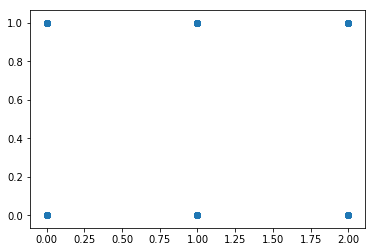

In [81]:
plt.scatter(df['variable1'], df['classLabel'])
plt.show()

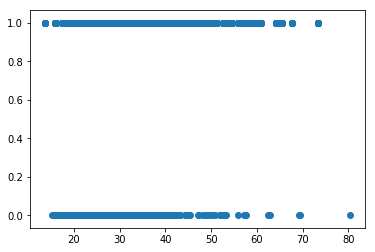

In [82]:
plt.scatter(df['variable2'], df['classLabel'])
plt.show()

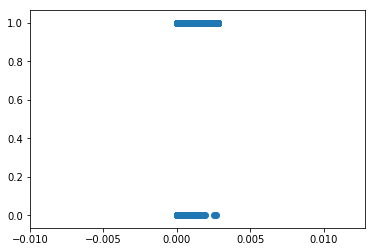

In [83]:
plt.scatter(df['variable3'], df['classLabel'])
plt.show()

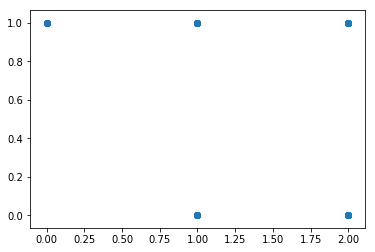

In [84]:
plt.scatter(df['variable4'], df['classLabel'])
plt.show()

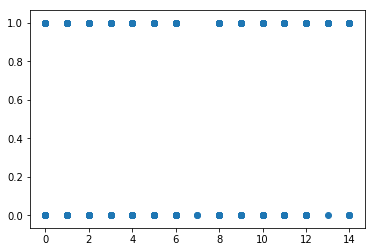

In [85]:
plt.scatter(df['variable6'], df['classLabel'])
plt.show()

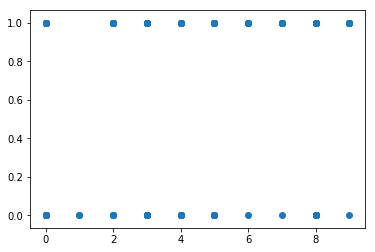

In [86]:
plt.scatter(df['variable7'], df['classLabel'])
plt.show()

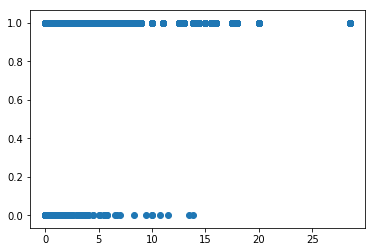

In [87]:
plt.scatter(df['variable8'], df['classLabel'])
plt.show()

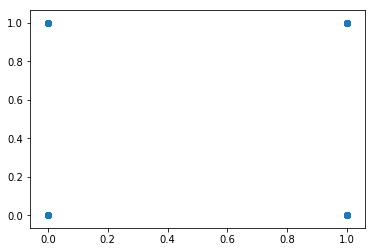

In [88]:
plt.scatter(df['variable9'], df['classLabel'])
plt.show()

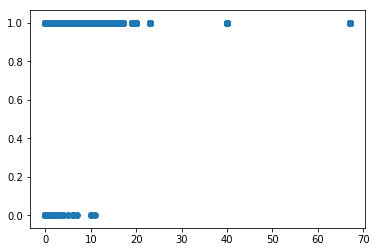

In [89]:
plt.scatter(df['variable11'], df['classLabel'])
plt.show()

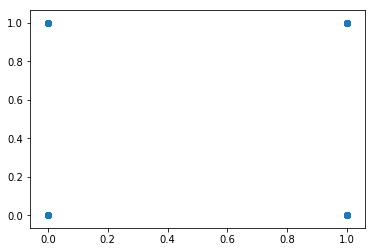

In [90]:
plt.scatter(df['variable12'], df['classLabel'])
plt.show()

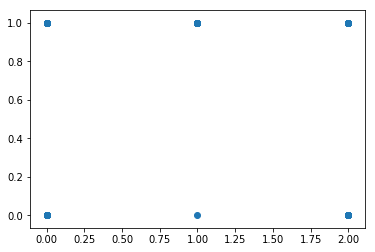

In [91]:
plt.scatter(df['variable13'], df['classLabel'])
plt.show()

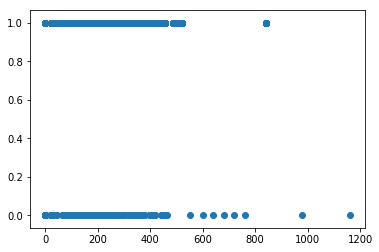

In [92]:
plt.scatter(df['variable14'], df['classLabel'])
plt.show()

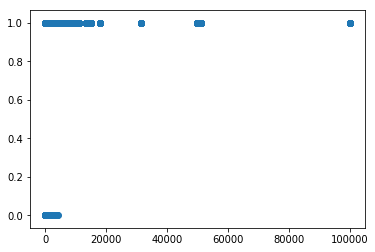

In [93]:
plt.scatter(df['variable15'], df['classLabel'])
plt.show()

> variable19 is misleading. In the training dataset, it has a perfect correlation with the target variable. In the testing dataset, no correlation appears. Thus, variable19 should be discarded since it will deceive the model during training by giving variable19 high importance.

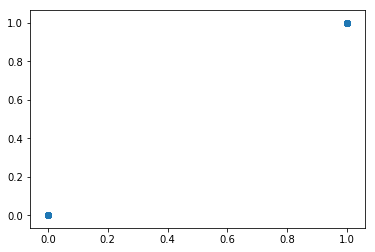

In [94]:
plt.scatter(df_variable19, df['classLabel'])
plt.show()

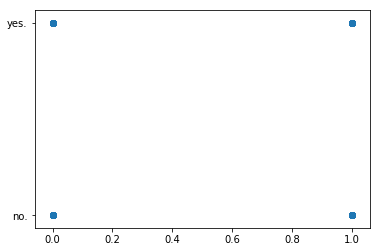

In [95]:
plt.scatter(testing_variable19, testing['classLabel'])
plt.show()

### Final Insights
> 1. 58% of var18 values are *NA*, var18 to be dropped
> 2. 100% correlation between var4 and var5, var5 to be dropped
> 3. 100% correlation between var14 and var17, var17 to be dropped
> 4. All rows that have var10 as *f* have var11 as *0*, when var10 is *t*, var11 is a positive integer, var10 to be dropped
> 5. variable19 is misleading. In the training dataset, it has a perfect correlation with the target variable. In the testing dataset, no correlation appears. Thus, variable19 should be discarded since it will deceive the model during training by giving variable19 high importance.